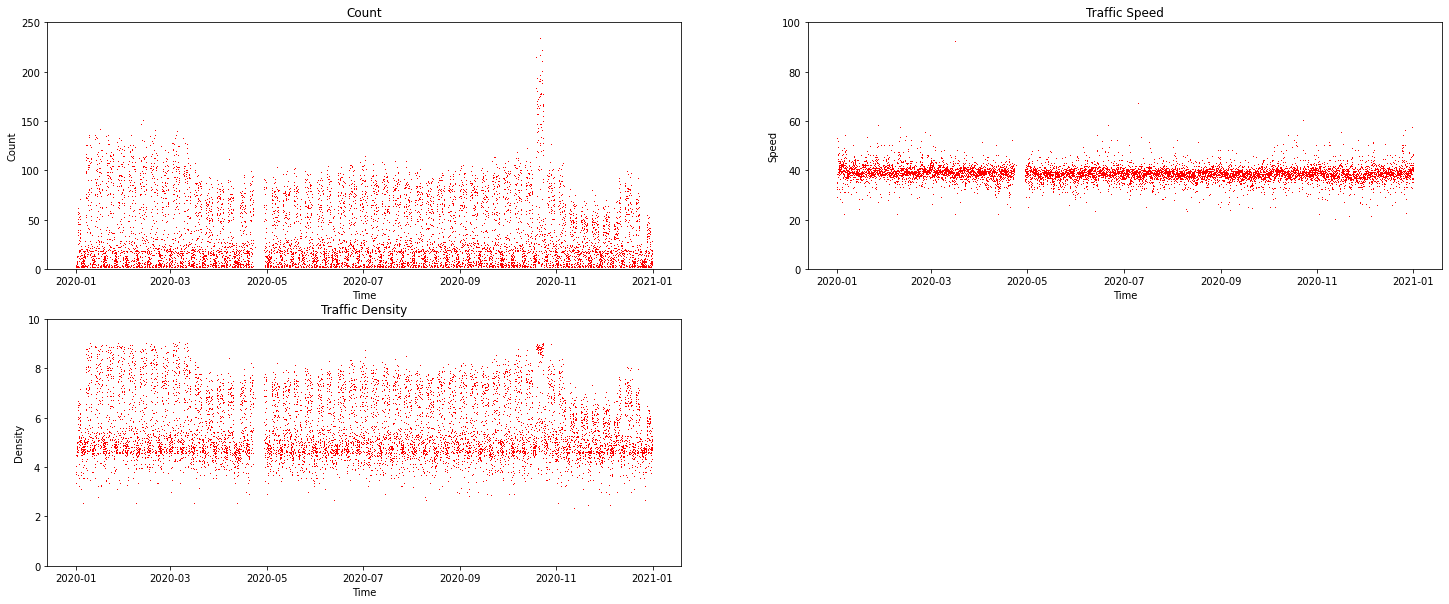

In [32]:
# Imports
import os
import csv

import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Traffic count and speed limit
count_limit = 150
speed_limit = 40

# CSV folder
folder = '210226_Daten_Hackathon/210226_Daten_Verkehr_Hackathon/'

# CSV files
files = os.listdir(folder)

# Traffic data of the direction
class TrafficData:
    # Traffic data
    time = []
    hour = []
    weekday = []
    week_number = []

    count = []
    speed = []
    speed_sum = []
    density = []

    def __init__(self, direction):
        self.direction = direction

    # Adds traffic data to the direction
    def add_data(self, time, speed):
        if(time in self.time):
            index = self.time.index(time)
            self.count[index] = self.count[index] + 1
            self.speed_sum[index] = self.speed_sum[index] + speed
        else:
            self.time.append(time)
            self.hour.append(time.hour)
            self.weekday.append(time.weekday)
            self.week_number.append(time.isocalendar()[1])

            self.count.append(1)
            self.speed_sum.append(speed)


# Traffic for each direction
traffic = {}

# Last read timestamp
last_time = 0

# Limits a value in an interval
def limit(value, min, max):
    if value < min:
        return min
    elif value > max:
        return max
    else:
        return value

# Maps a range of values to another
def map(value, min_in, max_in, min_out, max_out):
    scale = float(value - min_in) / float(max_in - min_in)
    scale = limit(scale, 0, 1)

    return (scale * float(max_out - min_out)) + min_out

# Read all CSV files
for file in files:

    # Open the CSV file
    with open(folder + file) as csv_file:
        # Read the CSV file with delimiter ';'
        csv_reader = csv.reader(csv_file, delimiter = ";")
        i = 0

        # Iterate through CSV rows
        for row in csv_reader:
            # Skip first 2 lines
            if i < 1:
                i = i + 1
                continue

            # Get parameters
            classification = row[0]
            confidence = int(row[1])
            direction = row[2]
            speed = int(row[3])
            time = datetime.datetime.strptime(row[4][:-3], '%d.%m.%Y %H')

            # Get current traffic instance
            if (direction in traffic) == False:
                traffic[direction] = TrafficData(direction)

            current = traffic[direction]

            # Add traffic data
            current.add_data(time, speed)

            # Set average speed
            if last_time != time:
                index = 0
                if last_time in current.time:
                    index = current.time.index(last_time)

                count = current.count[index]
                speed = current.speed_sum[index] / count
                density = (map(count, 0, count_limit, 0, 9) + map(speed, 0, speed_limit, 0, 9)) / 2

                current.speed.append(speed)
                current.density.append(density)
                last_time = time


data = traffic["Richtung A nach B"]
array = np.array([data.density, data.hour, data.weekday, data.week_number])

# Plot vehicle count
fig = plt.figure(figsize =(25, 10))
sub1 = fig.add_subplot(221)
sub1.set_title('Count')
sub1.set_xlabel('Time')
sub1.set_ylabel('Count')
sub1.set_ylim(0, 250)
sub1.plot(data.time, data.count, 'r,')

# Plot traffic speed
sub2 = fig.add_subplot(222)
sub2.set_title('Traffic Speed')
sub2.set_xlabel('Time')
sub2.set_ylabel('Speed')
sub2.set_ylim(0, 100)
sub2.plot(data.time, data.speed, 'r,')

# Plot traffic density
sub3 = fig.add_subplot(223)
sub3.set_title('Traffic Density')
sub3.set_xlabel('Time')
sub3.set_ylabel('Density')
sub3.set_ylim(0, 10)
sub3.plot(data.time, data.density, 'r,')

plt.show()